# Preprocessing tweet data
---

# 1. Import required modules

## 1.1. To install all required libraries

In [1]:
# Uncomment below line to install all the required dependencies
# !pip install -r ../requirements.txt -q

## 1.2. Imports

In [2]:
import re
import itertools

from IPython.display import clear_output

import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer

import seaborn as sns
import matplotlib.pyplot as plt

import emoji

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/varun487/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/varun487/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

# 2. Understanding the dataset

## 2.1. Load dataset

In [3]:
cols = ['sentiment', 'tweet_id', 'timestamp', 'query', 'user', 'text']
df = pd.read_csv('./data/dataset.csv', names=cols)

In [4]:
df.head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 2.2. Positive tweets

In [5]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


## 2.3. Negative tweets

In [6]:
df[df.sentiment != 4].head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 2.4. Number of tweets

In [7]:
df[df.sentiment != 0].shape

(800000, 6)

- Number of Negative tweets

In [8]:
df[df.sentiment != 4].shape

(800000, 6)

- Number of Positive tweets

In [9]:
data = [['negative', df[df.sentiment != 0].shape[0]], ['posistive', df[df.sentiment != 4].shape[0]]]
number_of_tweets_df = pd.DataFrame(data, columns = ['Sentiment', 'Number of tweets'])
number_of_tweets_df

,Sentiment,Number of tweets
0,negative,800000
1,posistive,800000


<AxesSubplot:xlabel='Sentiment', ylabel='Number of tweets'>

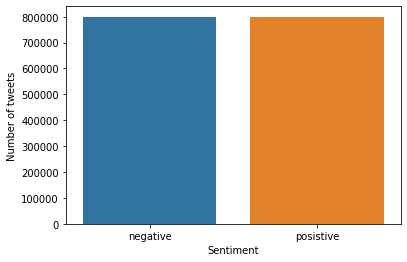

In [10]:
sns.barplot(x = 'Sentiment', y = 'Number of tweets', data = number_of_tweets_df)

---

# 3. Make sentiments either 0 or 1

In [11]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [12]:
df['sentiment'] = df['sentiment']//4

In [13]:
df[df.sentiment != 1].head()

,sentiment,tweet_id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
df[df.sentiment != 0].head()

,sentiment,tweet_id,timestamp,query,user,text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


---

# 4. Drop columns

In [15]:
df = df[['sentiment', 'text']]
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


---

# 5. Handle emoticons, emojis and contractions

- Credits for the emoticons and contractions dictionaries
    - https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597

In [16]:
emoticons =  {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

In [17]:
contractions = {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "i'm": "I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

---

# 5. Clean tweets


In [18]:
# stop words
stop = set(stopwords.words("english"))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
def clean_tweet(tweet):
    
    # Remove @ mentions
    cleaned_tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    
    # Remove hashtags
    cleaned_tweet = re.sub(r'#[A-Za-z0-9_]+', '', cleaned_tweet)
    
    # Remove hyperlinks
    cleaned_tweet = re.sub(r'https?://[A-Za-z0-9_./?]+', '', cleaned_tweet)
    
    # Replace Contractions
    cleaned_tweet = cleaned_tweet.replace("’","'")
    cleaned_tweet = " ".join([contractions[word] if word in contractions else word for word in cleaned_tweet.split()])
    
    # Replace emoticons
    cleaned_tweet = cleaned_tweet.replace("’","'")
    cleaned_tweet = " ".join([emoticons[word] if word in emoticons else word for word in cleaned_tweet.split()])
    
    # Replace emojis
    cleaned_tweet = emoji.demojize(cleaned_tweet)
    cleaned_tweet = cleaned_tweet.replace(":"," ")
    cleaned_tweet = ' '.join(cleaned_tweet.split())
    
    # Fix misspelled words
    cleaned_tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(cleaned_tweet))
    
    # Remove special characters
    cleaned_tweet = re.sub(r'&[a-zA-Z0-9_]+;', '', cleaned_tweet)
    
    # Remove new line
    cleaned_tweet = re.sub(r'\n', '', cleaned_tweet)
    
    # Remove tab
    cleaned_tweet = re.sub(r'\t', '', cleaned_tweet)
    
    # Remove html
    cleaned_tweet = re.sub(r'<.*?>', '', cleaned_tweet)
    
    # Remove punctuations
    cleaned_tweet = re.sub(r'[-,:;.+?<>()!%=_*&^$/]', ' ', cleaned_tweet)
    
    # Remove apostrphe
    cleaned_tweet = re.sub(r'[\']', '', cleaned_tweet)
    
    # Remove numbers
    cleaned_tweet = re.sub(r'[0-9]+', '', cleaned_tweet)
    
    # Remove all single characters
    cleaned_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_tweet)
    
    # Substituting multiple spaces with single space
    cleaned_tweet= re.sub(r'\s+', ' ', cleaned_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    cleaned_tweet = re.sub(r'^b\s+', '', cleaned_tweet)
 
    # Converting to Lowercase
    cleaned_tweet = cleaned_tweet.lower()
    
    # Remove stop words
    cleaned_tweet = " ".join([word for word in cleaned_tweet.split() if word not in stop])
    
    return cleaned_tweet


In [20]:
cleaned_tweets = []
count = 0

for tweet in df['text']:
#     print("Tweet:", tweet)
#     print()
#     print("Cleaned Tweet:", clean_tweet(tweet))
#     print()
#     print()
    cleaned_tweets.append(clean_tweet(tweet))
    
    count += 1
    if count % 1000 == 0:
        clear_output(wait=True)
        print(f"Completed cleaning {count}/1600000 tweets.")

df['cleaned_tweet'] = cleaned_tweets

Completed cleaning 1600000/1600000 tweets.


In [21]:
df.head()

,sentiment,text,cleaned_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cannot update facebook texting might cry...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cannot see


# 6. Porter Stemmer

In [22]:
stemmed_tweets = []
ps = PorterStemmer()

count = 0

for tweet in df['cleaned_tweet']:
    words = word_tokenize(tweet)
    temp = []
    for w in words:
        root = ps.stem(w)
        temp.append(root)
    temp =' '.join(temp)
    stemmed_tweets.append(temp)
    
    count += 1
    if count % 1000 == 0:
        clear_output(wait=True)
        print(f"Completed Stemming {count}/1600000 tweets.")

df['Porter_Stem'] = stemmed_tweets

Completed Stemming 1600000/1600000 tweets.


In [23]:
df.head()

,sentiment,text,cleaned_tweet,Porter_Stem
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww bummer shoulda got david carr third day,aww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cannot update facebook texting might cry...,upset can not updat facebook text might cri re...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cannot see,behav im mad can not see


# 7. Snowball Stemmer

In [24]:
stemmed_tweets = []
ss = SnowballStemmer("english")

count = 0

for tweet in df['cleaned_tweet']:
    words = word_tokenize(tweet)
    temp = []
    for w in words:
        root = ss.stem(w)
        temp.append(root)
    temp =' '.join(temp)
    stemmed_tweets.append(temp)
    
    count += 1
    if count % 1000 == 0:
        clear_output(wait=True)
        print(f"Completed Stemming {count}/1600000 tweets.")
    
df['Snowball_Stem'] = stemmed_tweets

Completed Stemming 1600000/1600000 tweets.


In [25]:
df.head()

,sentiment,text,cleaned_tweet,Porter_Stem,Snowball_Stem
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww bummer shoulda got david carr third day,aww bummer shoulda got david carr third day,aww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cannot update facebook texting might cry...,upset can not updat facebook text might cri re...,upset can not updat facebook text might cri re...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,dive mani time ball manag save rest go bound,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cannot see,behav im mad can not see,behav im mad can not see


# 8. Preprocessed data to csv

In [26]:
df.to_csv("./data/cleaned_tweets.csv", index = False)

---